# Data Challenge in SHS
***

 Present notebook is my assignment for the "IA & SHS: Data challenge" course, whose description can be found __[here](https://benedictecolnet.github.io/files/Data_Challenge_SHS.pdf)__.
 As an input I have a dataset with information about employees and their salary, and the goal is to perform an exploratory analysis on this data, then use it to make predictions about salaries of employees from separate dataset and, finally, access the effect of gender on the employee's salary

## 1. Exploratory data analysis

### 1.0 Data description

I will first import the dataset and take a look on what information I have at hand, to get an idea of how I will process it further

In [3]:
import pandas      as pd
import numpy       as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn     as sns
import missingno   as msno


matplotlib.use('nbagg')
%matplotlib inline

df = pd.read_csv (r'train_val_data.csv')
df.head()

,rate,hrswkd,statenum,summed_annual_salary,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,annual
0,0.0,40.0,17758,NaN,texas department of transportation,L,2129,engineering specialist iii,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/01/10,54000.00
1,0.0,40.0,80987,NaN,health and human services commission,G,1325,inspector v,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,43331.28
2,0.0,40.0,18023,NaN,department of public safety,,0174,license and permit spec v,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,02/13/12,59438.88
3,0.0,40.0,1269844,NaN,texas department of transportation,,9305,trans maint spec i,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/22/20,37200.00
4,0.0,40.0,184217,NaN,department of family and protective services,G,0156,administrative asst iv,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,08/01/97,35533.08


rate                         0
hrswkd                       0
statenum                     0
summed_annual_salary   -117467
agency_name                  0
mi                           0
class_code                   0
class_title                  0
ethnicity                    0
gender                       0
employee_type                0
hire_date                    0
annual                       0
dtype: int64

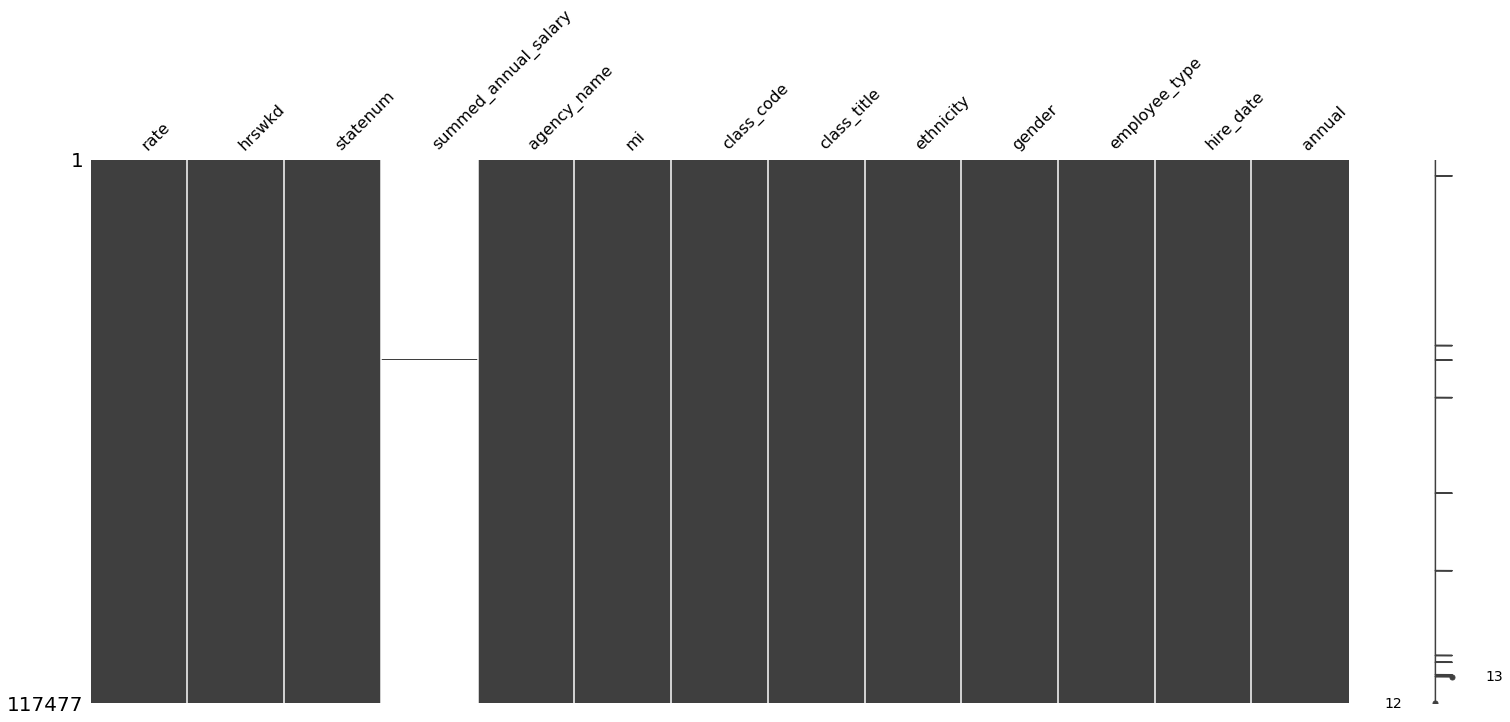

In [2]:
# Number of Na's for variables

msno.matrix(df)
df.count()-df.notna().count()

The only variable with NaN's (lots of them) is summed_annual_salary - I will look at it closer later, but now I can safely move forward with all the others

 Next I will look closely at each variable - it's type, distribution and effect on the main dependent variable. 
I will also check for the possible interconnections between independent variables and finally, propose necessary transofrmations for the final modeling. First - what is the class for each variable?

In [4]:
df.dtypes

rate                    float64
hrswkd                  float64
statenum                  int64
summed_annual_salary    float64
agency_name              object
mi                       object
class_code               object
class_title              object
ethnicity                object
gender                   object
employee_type            object
hire_date                object
annual                  float64
dtype: object

 It should be noted, that 'class_code' is stored as an objects, despite having numerical values. Similarly, the hire_date will require a transformation as it is not stored as a datetime

## 1.1 Main dependent variable: annual

I will first start with 'annual', which is the main dependent variable - what is a distribution of the values of this variable?

<AxesSubplot:xlabel='annual', ylabel='Count'>

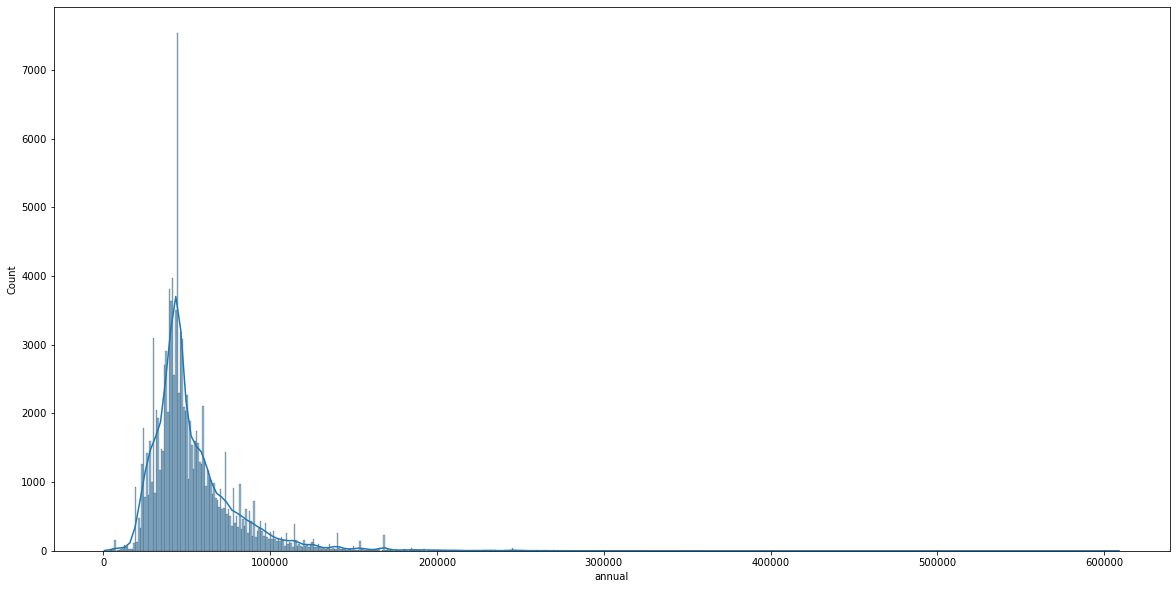

In [180]:
fig= plt.subplots(figsize=(20,10))
sns.histplot(data=df, x="annual",kde=True)

Distribution has a long tail on the right side. However, as it is the dependent variable, I will not transform it

To have an insight into what other variables might affect it, I will look at the pairplot for all the numerical variables in the dataset

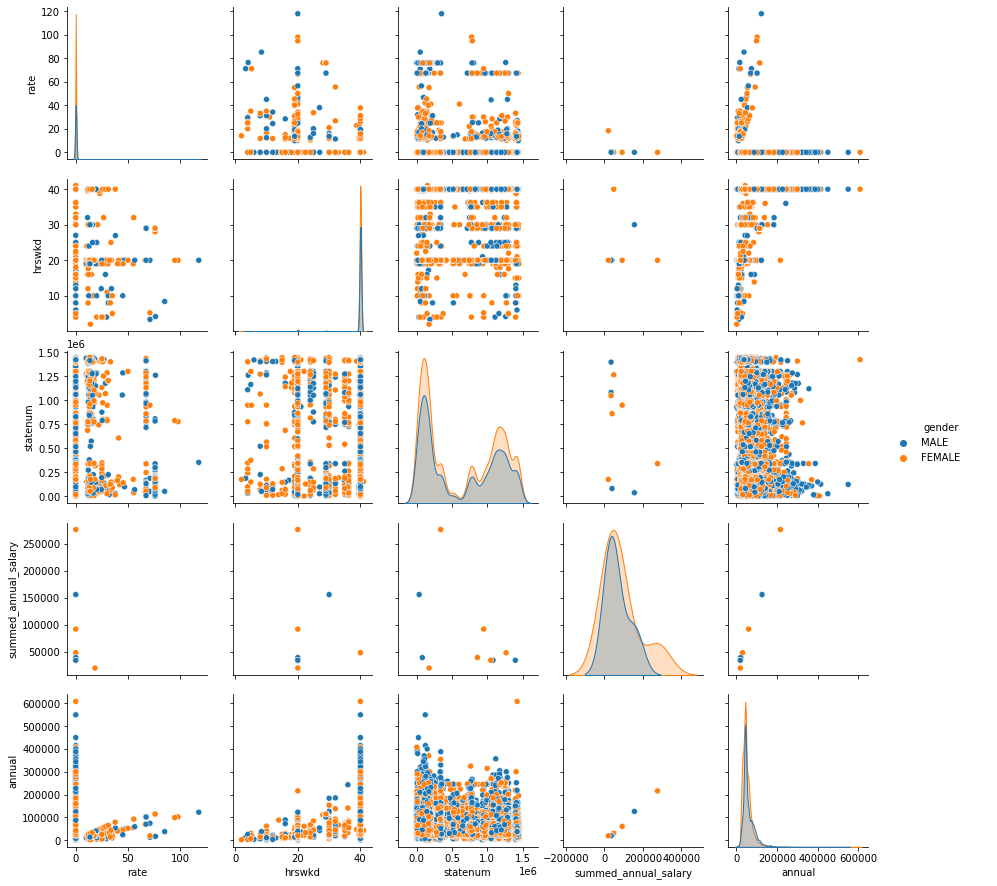

In [5]:
sns.pairplot(df,hue='gender')

It looks like 'rate', 'hrswkd' and 'summed_annual_salary' have some effect on the salary with no visible difference between the genders, so I will continue with investigations for them separetely. Also, there is no visible dependency between independent variables

## Dependent variables

Next I will inspect other variables with numerical values - 'rate', 'hrswkd', 'statenum' and 'class_code'

## 1.2 Variable rate

In [7]:
# What are the maximum and minimum balues for it?
df.sort_values('rate',ascending=False)['rate']

72217     117.78848
30581      97.95458
67655      94.73365
107624     85.16291
8599       76.34569
            ...    
39282       0.00000
39281       0.00000
39280       0.00000
39279       0.00000
117476      0.00000
Name: rate, Length: 117477, dtype: float64

In [13]:
print("The share of zero values for variable rate is %.2f %%" %(100*len(df[df['rate']==0])/len(df)))

print('Number of non-null rows for \'rate\' is', df[df['rate']!=0]['rate'].count(),', or',
      100*round((df[df['rate']!=0]['rate'].count()/df['rate'].count()),4),'% of all input rows')

The share of zero values for variable rate is 99.31 %
Number of non-null rows for 'rate' is 813 , or 0.69 % of all input rows


It appears that most of the values a zero, therefore I will only look at non-zero rows

In [8]:
df[df['rate']!=0]

,rate,hrswkd,statenum,summed_annual_salary,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,annual
120,75.96150,29.0,199672,NaN,"comptroller of public accounts, judiciary section",J,jd25,"judge, retired",BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12/15/89,114549.84
178,15.00000,20.0,1432901,NaN,senate,R,7102,legislative admin. support,WHITE,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,11/15/21,15600.00
371,75.96150,29.0,126533,NaN,"comptroller of public accounts, judiciary section",,jd25,"judge, retired",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,07/01/18,114549.84
403,75.96150,29.0,175128,NaN,"comptroller of public accounts, judiciary section",L,jd25,"judge, retired",WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/01/17,114549.84
490,75.96150,29.0,262114,NaN,"comptroller of public accounts, judiciary section",C,jd25,"judge, retired",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,09/01/85,114549.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116900,15.71002,40.0,1399369,NaN,parks and wildlife department,E,2688,fish and wildlife tech i,WHITE,FEMALE,CTF - CLASSIFIED TEMPORARY FULL-TIME,04/12/21,32676.84
116990,13.57000,19.0,1414232,NaN,school for the blind and visually impaired,C,hour,hourly/substitutes,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,08/02/21,13407.12
117019,67.30765,29.0,129882,NaN,"comptroller of public accounts, judiciary section",M,f023,"district judge, former",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/01/07,101499.84
117159,75.96150,29.0,184266,NaN,"comptroller of public accounts, judiciary section",B,jd25,"judge, retired",WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/01/99,114549.84


I suggest that this variable reflects the payment per some timeperiod, so I will check whether this hypothesis works

In [19]:
numbers=df[df['rate']!=0]['annual']/(df[df['rate']!=0]['rate']*df[df['rate']!=0]['hrswkd'])
numbers=np.array(numbers)
numbers=np.sort(numbers)
numbers

array([51.99874599, 51.99881599, 51.99881599, 51.99883749, 51.999     ,
       51.99907865, 51.99909969, 51.99935889, 51.99945345, 51.99948693,
       51.99948693, 51.99948837, 51.99950477, 51.99952417, 51.99952584,
       51.99952774, 51.99953951, 51.999548  , 51.99955487, 51.99955753,
       51.99957966, 51.9996    , 51.9996    , 51.9996    , 51.9996    ,
       51.99962156, 51.99962317, 51.99963612, 51.99963612, 51.99966456,
       51.99966456, 51.99967259, 51.99967711, 51.99967717, 51.99967855,
       51.99967855, 51.99968272, 51.99968919, 51.99969004, 51.99969088,
       51.99969231, 51.99969231, 51.99969231, 51.99969231, 51.99969231,
       51.99970523, 51.99972008, 51.99972008, 51.99972173, 51.99974258,
       51.99974393, 51.99974424, 51.99974762, 51.9997487 , 51.9997487 ,
       51.9997516 , 51.99975232, 51.99975232, 51.99975257, 51.99975505,
       51.99975505, 51.99975505, 51.99975938, 51.99975938, 51.99975943,
       51.99975943, 51.99976791, 51.99977072, 51.99977072, 51.99

Indeed, it appears that for instances with non-null values of 'rate', the values of annual salary are equal to 52 * rate * hrswrkd, meaning that rate is probably a payment for each hour worked and hrswrkd is probably a number of hours worked in a week.
However, because I cannot find a meaningfull groups among those entities for which the rate is present, 
I will exclude this variable from the further analysis, as it will likely distort the results

## 1.3 Variable hrswkd

In [181]:
# What is a distribution of number of working hours in a dataset?
display(df.groupby(['hrswkd']).size())

hrswkd
2.00          1
3.35          1
4.00         13
4.15          1
5.00          6
5.20          1
6.00          1
8.00         10
8.40          1
10.00        26
11.00         1
12.00         5
13.00         1
13.88         1
15.00         8
16.00        11
17.20         1
17.60         1
18.00         2
19.00        93
19.20         4
20.00      1226
21.00         2
22.00         2
22.50         1
24.00        49
25.00        22
26.93         1
27.00         1
28.00         1
29.00       379
30.00       145
30.60         1
32.00        20
33.00         1
35.00       103
36.00         4
36.25        73
38.80         1
39.60         6
40.00    115249
41.00         1
dtype: int64

The vast majority of people work full-time or 40 hours, with relatively small numbers of people working less

<AxesSubplot:xlabel='hrswkd', ylabel='annual'>

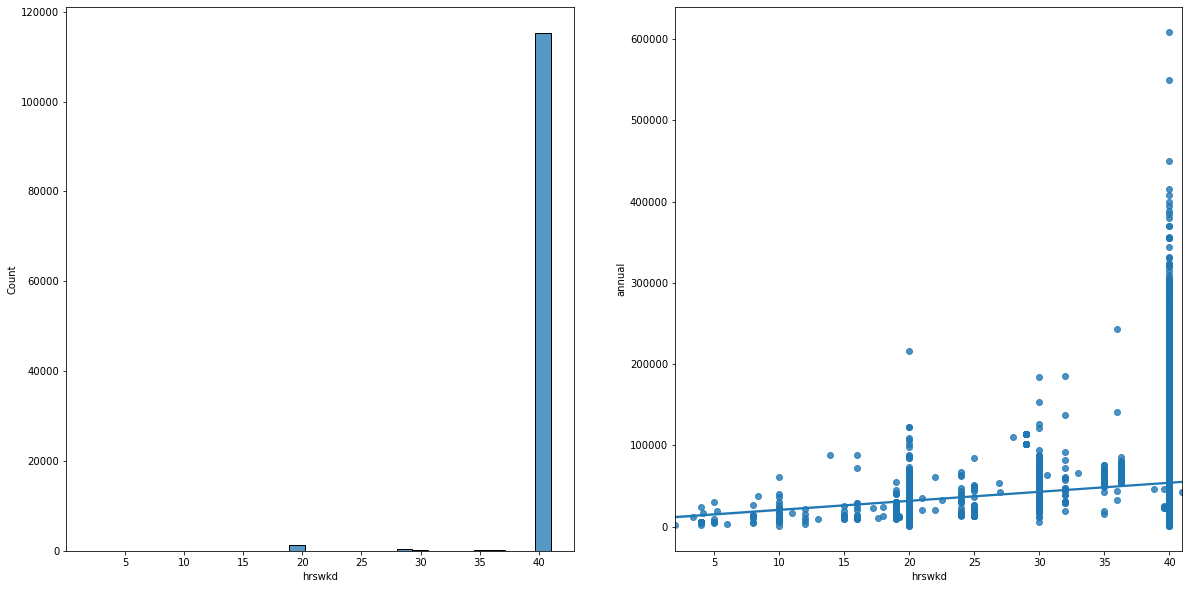

In [178]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.histplot(data=df, x="hrswkd", bins=30, ax=axs[0])
sns.regplot(x="hrswkd", y="annual", data=df, ax=axs[1])

People working longer hours tend to get more money, however the variance is too high for meaningfull conclusions

## 1.4 Variable statenum

In [48]:
print('There are %.2f %% of entities, for which statenum has a unique value' %(100*(len(df['statenum'].unique()))/len(df)))

df.groupby(['statenum']).size().sort_values(ascending=False).head(10)

There are 99.99 % of entities, for which statenum has a unique value


statenum
1397927    2
1081650    2
34944      2
949488     2
174668     2
1049439    2
339371     2
860235     2
163975     1
163917     1
dtype: int64

In [12]:
len(df[df['statenum'].isin([1397927,1081650,34944,949488,174668,1049439,339371,860235])].sort_values(by=['statenum']))

16

 It appears that there are only 16 entities for which the statenum is not unique, therefore it does not make sence to keep this variable and I will exclude it from the further analysis

## 1.5 Variable summed_annual_salary

In [13]:
# I will look at the rows for which the variable is present

df[df['summed_annual_salary'].notnull()]

,rate,hrswkd,statenum,summed_annual_salary,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,annual
3502,0.00,20.0,860235,40090.92,school for the blind and visually impaired,M,5124,direct support prof iv,HISPANIC,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,09/14/15,22078.92
40172,0.00,20.0,1081650,34884.00,school for the blind and visually impaired,T,5123,direct support prof iii,BLACK,MALE,CRP - CLASSIFIED REGULAR PART-TIME,09/05/17,18324.00
43298,0.00,40.0,1265858,48817.08,health and human services commission,L,5122,direct support prof ii,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/15/21,30169.20
51419,0.00,20.0,949488,92400.00,legislative budget board,M,p070,analyst,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/01/16,60000.00
72065,0.00,20.0,79455,39774.00,school for the blind and visually impaired,T,7354,library assistant ii,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/07/99,20628.00
88822,0.00,20.0,1049439,34836.00,school for the blind and visually impaired,F,9323,vehicle driver ii,HISPANIC,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,11/07/16,18276.00
107146,0.00,20.0,1397927,34950.00,school for the blind and visually impaired,D,5123,direct support prof iii,BLACK,MALE,CRP - CLASSIFIED REGULAR PART-TIME,03/01/21,18900.00
108609,18.36,20.0,174668,20554.56,state preservation board,A,0132,customer service rep ii,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,09/23/10,19094.40
111306,0.00,30.0,34944,156000.00,senate,,7101,leg. official/administrator,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/01/21,126000.00
111698,0.00,20.0,339371,276000.00,legislative budget board,L,c160,committee director,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,11/01/17,216000.00


 Seems like this variable is only presented for the non-unique states and shows the summed values of annual salary for those - I will exclude it from the further analysis, because there is no enough data to use and as it only will add noise to the model

## 1.6 Variable mi

I will look on the frequency of appearence for each category first

In [15]:
display(df.groupby(['mi']).size())

mi
     31316
A    10573
B     2369
C     4356
D     6941
E     4821
F     1368
G     2625
H     1348
I      867
J     5923
K     2628
L    10040
M     9428
N     2883
O     1295
P     1823
Q      125
R     6427
S     3762
T     2131
U      165
V      883
W     2455
X       70
Y      699
Z      156
dtype: int64

<AxesSubplot:xlabel='mi', ylabel='annual'>

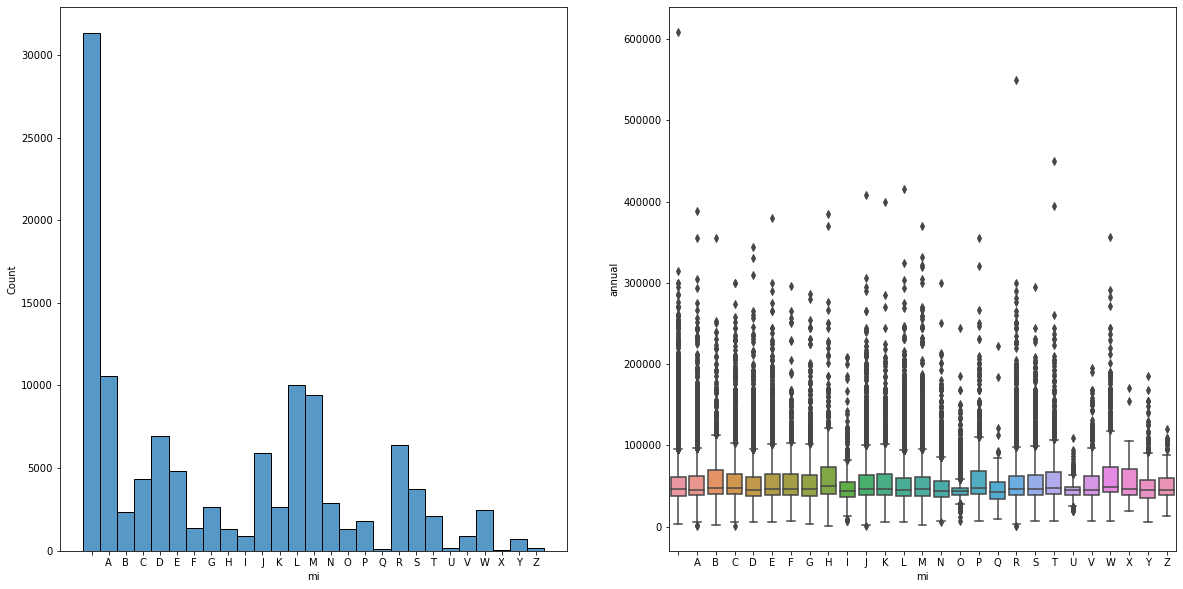

In [64]:
df=df.sort_values(by=['mi'])

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.histplot(data=df, x="mi",discrete=True, ax=axs[0])
sns.boxplot(x="mi", y="annual", data=df.sort_values(by=['mi']), ax=axs[1])

There are a lot of missing values for this variable - however, as I will treat it as categorical, this missing values will be handled as a special symbol and not add any problems. Additionally, it doesn't seemd that this variable affects the salary

## 1.7 Variable agency_name

In [67]:
display(df.groupby(['agency_name']).size())
print('There are %.2f %% of entities, for which statenum has a unique value' %(100*(len(df['agency_name'].unique()))/len(df)))

agency_name
alcoholic beverage commission           466
board of architectural examiners         18
board of chiropractic examiners          10
board of dental examiners                41
board of nurse examiners                 99
                                       ... 
third court of appeals district          26
thirteenth court of appeals district     25
treasury safekeeping trust company       64
twelfth court of appeals district         9
water development board                 303
Length: 111, dtype: int64

There are 0.09 % of entities, for which statenum has a unique value


Because this variable has very few unique values, I will one-hot encode it

## 1.8 Variables class_code and class_title

In [73]:
print('There are %.2f %% unique combinations of class_code and class_title within the dataset' %(100*round((df.groupby(['class_code','class_title']).ngroups - df.groupby(['class_code']).ngroups)/df.groupby(['class_code','class_title']).ngroups,3)))
#df.groupby(['class_code']).ngroups
#df.groupby(['class_title']).ngroups

There are 4.00 % unique combinations of class_code and class_title within the dataset


It appears that class_code and class_title follow each other very rigidly - only 4% of combinations are unique

In [19]:
df['class_title'].head()

117476                  h/srvc spec iii
56459                    data analyst v
26528       license and permit spec iii
56460                   network spec ii
104221    systems support specialist ii
Name: class_title, dtype: object

Interestingly, there are roman numbers at the end of the class_title for some instances - I will check the share of those

In [20]:
print("Only",
      round(
          (100*
     (len(df)-len(df[(df['class_title'].str[-2:]==' i')|(df['class_title'].str[-3:]==' ii')|(df['class_title'].str[-4:]==' iii')
       |(df['class_title'].str[-3:]==' iv')|(df['class_title'].str[-2:]==' v')|(df['class_title'].str[-3:]==' vi')
       |(df['class_title'].str[-4:]==' vii')|(df['class_title'].str[-5:]==' viii')]))/len(df)),2),
      "% of rows don't have any number at the end of employee_type")

Only 8.98 % of rows don't have any number at the end of employee_type


Turns out that majority of instances have this level at the end, so I will extract it and see what it gives me

In [21]:
df[(df['class_title'].str[-2:]!=' i')&(df['class_title'].str[-3:]!=' ii')&(df['class_title'].str[-4:]!=' iii')
       &(df['class_title'].str[-3:]!=' iv')&(df['class_title'].str[-2:]!=' v')&(df['class_title'].str[-3:]!=' vi')
       &(df['class_title'].str[-4:]!=' vii')&(df['class_title'].str[-5:]!=' viii')]

,rate,hrswkd,statenum,summed_annual_salary,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,annual
26515,75.9615,29.0,65083,NaN,"comptroller of public accounts, judiciary section",,jd25,"judge, retired",HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/01/09,114549.84
56478,0.0000,40.0,76480,NaN,department of public safety,,9940,"sergeant, dps",HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/21/07,90717.96
104228,0.0000,40.0,159295,NaN,department of public safety,,9928,trooper,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,02/01/07,81441.00
26563,0.0000,40.0,1422396,NaN,office of court administration,,a212,associate judge,HISPANIC,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,10/01/21,126000.00
26552,0.0000,40.0,189905,NaN,texas department of criminal justice,,4510,sgt of correc offcrs,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,11/07/05,45730.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36290,0.0000,40.0,1125176,NaN,department of public safety,Z,9928,trooper,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/03/18,59715.00
92761,0.0000,40.0,33126,NaN,department of public safety,Z,9928,trooper,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/03,85203.96
82752,0.0000,40.0,949082,NaN,texas department of criminal justice,Z,4510,sgt of correc offcrs,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/04/16,46873.08
88621,0.0000,40.0,1074799,NaN,department of public safety,Z,9928,trooper,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/09/17,72810.96


I can't see anything special about the instances without levels, so I will go further with extraction - I will create a new variable, in which this number will be stored as a  numeric value

In [75]:
conditions = [
    (df['class_title'].str[-2:]==' i'   ),
    (df['class_title'].str[-3:]==' ii'  ),
    (df['class_title'].str[-4:]==' iii' ),
    (df['class_title'].str[-3:]==' iv'  ),
    (df['class_title'].str[-2:]==' v'   ),
    (df['class_title'].str[-3:]==' vi'  ),
    (df['class_title'].str[-4:]==' vii' ),
    (df['class_title'].str[-5:]==' viii'),
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5,6,7,8]

# create a new column and use np.select to assign values to it using our lists as arguments
df['class_level'] = np.select(conditions, values)

Now I will look at the distribution of those and also check if there is any dependency between this number and salary

class_level
0    10551
1    18927
2    22703
3    23760
4    22856
5    14877
6     2777
7     1010
8       16
dtype: int64

<AxesSubplot:xlabel='class_level', ylabel='annual'>

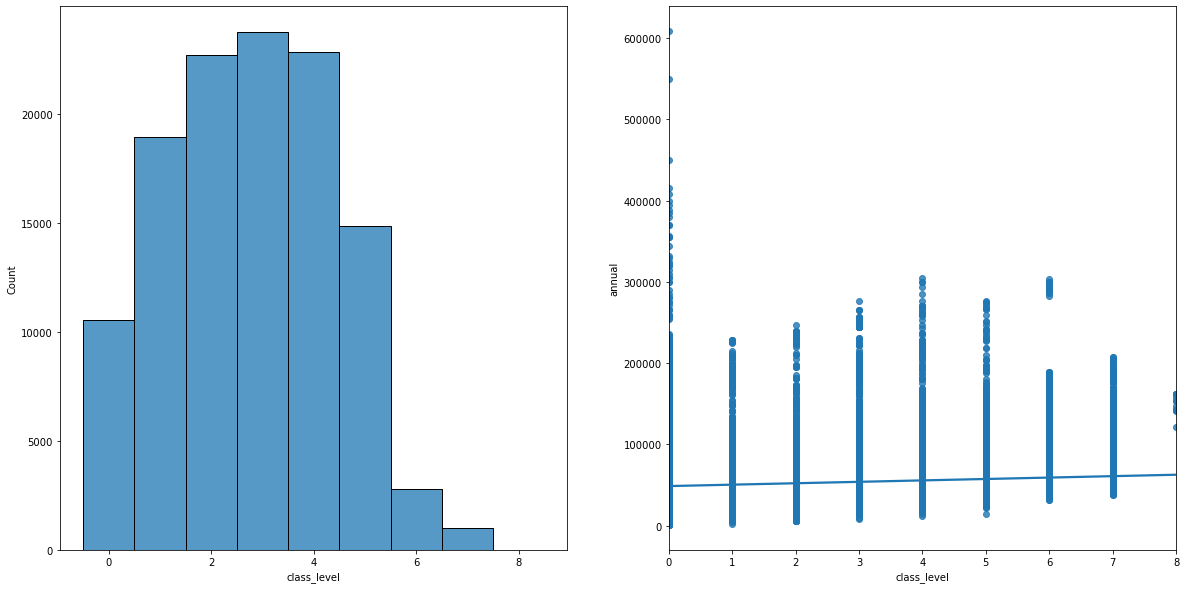

In [76]:
display(df.groupby(['class_level']).size())


fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
#sns.displot(data=df, x="class_level",discrete=True)

sns.histplot(data=df, x="class_level",discrete=True, ax=axs[0])
sns.regplot(data=df, x="class_level", y="annual", ax=axs[1])

In [24]:
print("The median value of the variable is ",
      np.median(df['class_level']),
      " and the mean is ",
      round(np.mean(df['class_level']),2))

The median value of the variable is  3.0  and the mean is  2.77


The levels are distributed pretty normaly, but I suppose that it will make sence to impute the zeros (titles without the level) with the some common number - I will use median for that to preserve the integer character of the variable and because the mean and median are very close

<AxesSubplot:xlabel='class_level', ylabel='annual'>

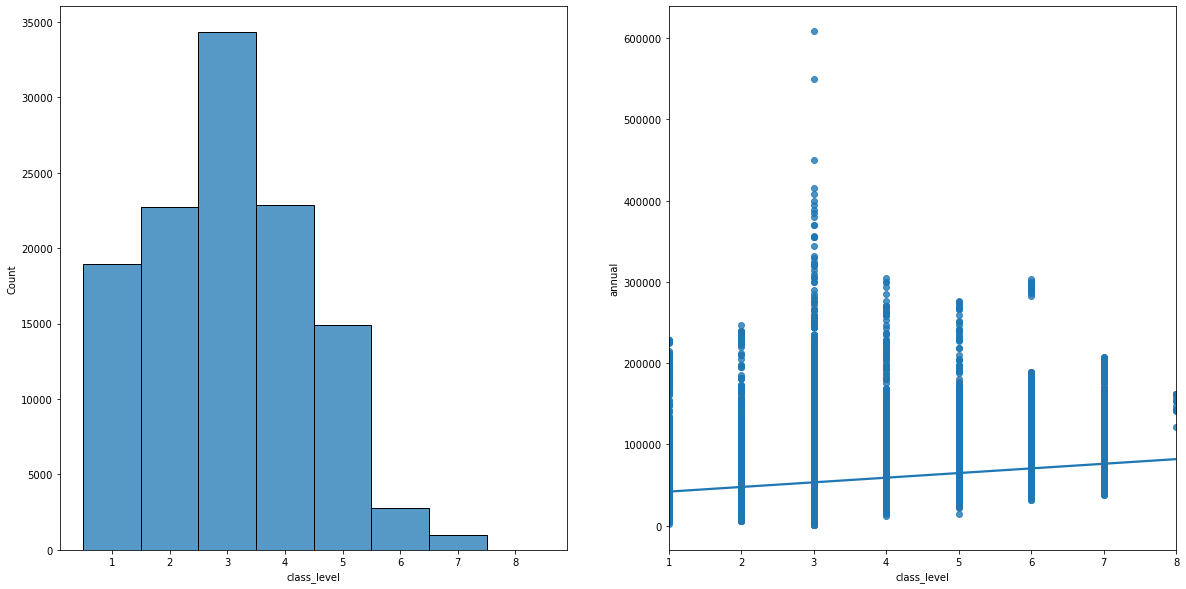

In [77]:
classmedian=np.median(df['class_level'])
df['class_level'] = df['class_level'].replace(0, classmedian)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
#sns.displot(data=df, x="class_level",discrete=True)

sns.histplot(data=df, x="class_level",discrete=True, ax=axs[0])
sns.regplot(data=df, x="class_level", y="annual", ax=axs[1])

It seems like after the imputation the correlation gets stronger, which is good

## 1.9 Variable employee_type 

I will first look at what categories do I have and look at their distribution

In [141]:
display(df.groupby(['employee_type']).size())

employee_type
CRF - CLASSIFIED REGULAR FULL-TIME          112029
CRP - CLASSIFIED REGULAR PART-TIME            1374
CTF - CLASSIFIED TEMPORARY FULL-TIME           392
CTP - CLASSIFIED TEMPORARY PART-TIME            54
ERF - EXEMPT REGULAR FULL-TIME                 790
URF - UNCLASSIFIED REGULAR FULL-TIME          2025
URP - UNCLASSIFIED REGULAR PART-TIME           779
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          14
UTP - UNCLASSIFIED TEMPORARY PART-TIME          20
dtype: int64

[Text(0, 0, 'CRF - CLASSIFIED REGULAR FULL-TIME      '),
 Text(1, 0, 'CTF - CLASSIFIED TEMPORARY FULL-TIME    '),
 Text(2, 0, 'CRP - CLASSIFIED REGULAR PART-TIME      '),
 Text(3, 0, 'URF - UNCLASSIFIED REGULAR FULL-TIME    '),
 Text(4, 0, 'CTP - CLASSIFIED TEMPORARY PART-TIME    '),
 Text(5, 0, 'ERF - EXEMPT REGULAR FULL-TIME          '),
 Text(6, 0, 'URP - UNCLASSIFIED REGULAR PART-TIME    '),
 Text(7, 0, 'UTP - UNCLASSIFIED TEMPORARY PART-TIME  '),
 Text(8, 0, 'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ')]

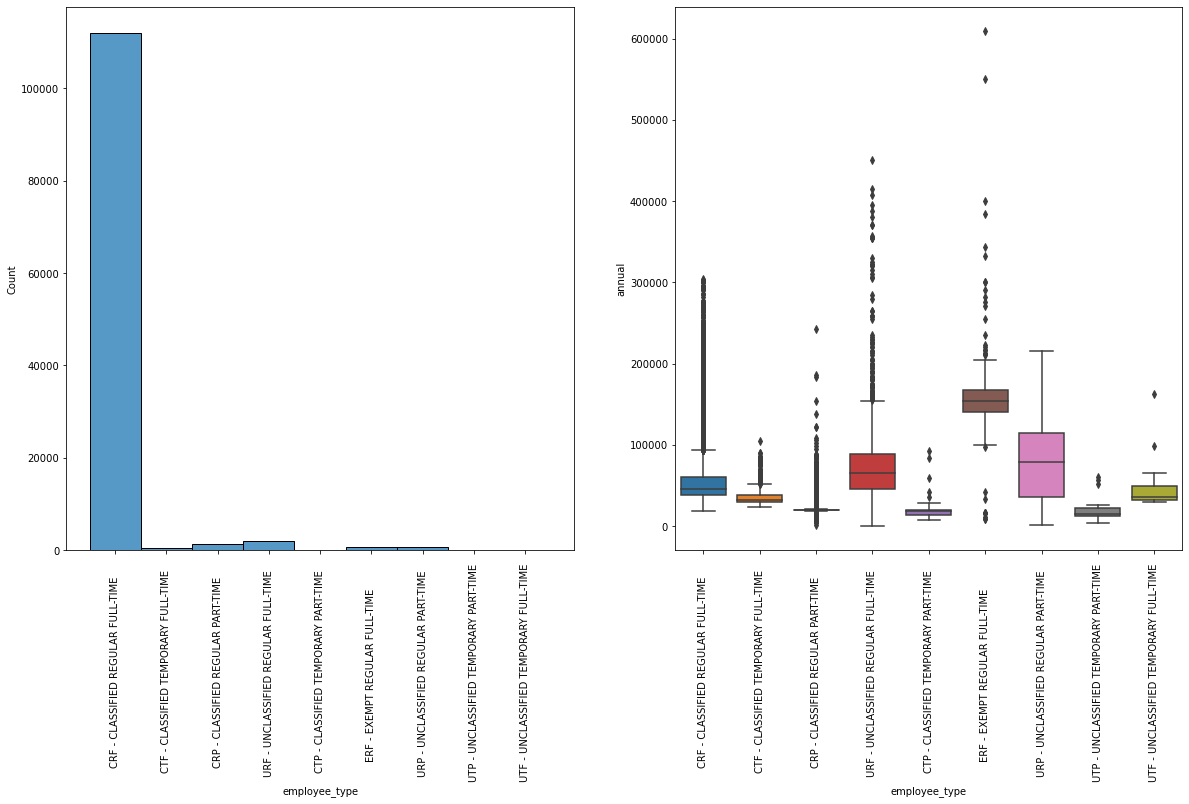

In [140]:
import matplotlib.ticker as mticker

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

sns.histplot(data=df, x="employee_type", ax=ax1)
ax1.tick_params(axis='x', rotation=90)


sns.boxplot(x="employee_type", y="annual", data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

First category is overrepresented between the 6 and there is clearly some dependency between this variable and salary.
Also it seems to make sense to divide the variable into three levels: <br>
    1. Classified/Exempt/Unclassified for the first one <br>
    2. Regular/Temporary for the second one <br>
    3. Full-time/Part-time for the third one <br>

I will disasemble it into three levels and one-hot encode those into 7 binary variables

## 1.10 Variable ethnicity

I will first look at what categories do I have and look at their distribution

In [ ]:
display(df.groupby(['ethnicity']).size())

ethnicity
AM INDIAN            550
ASIAN               3624
BLACK              27307
HISPANIC           32265
OTHER               1484
WHITE              52247
dtype: int64

<AxesSubplot:xlabel='ethnicity', ylabel='annual'>

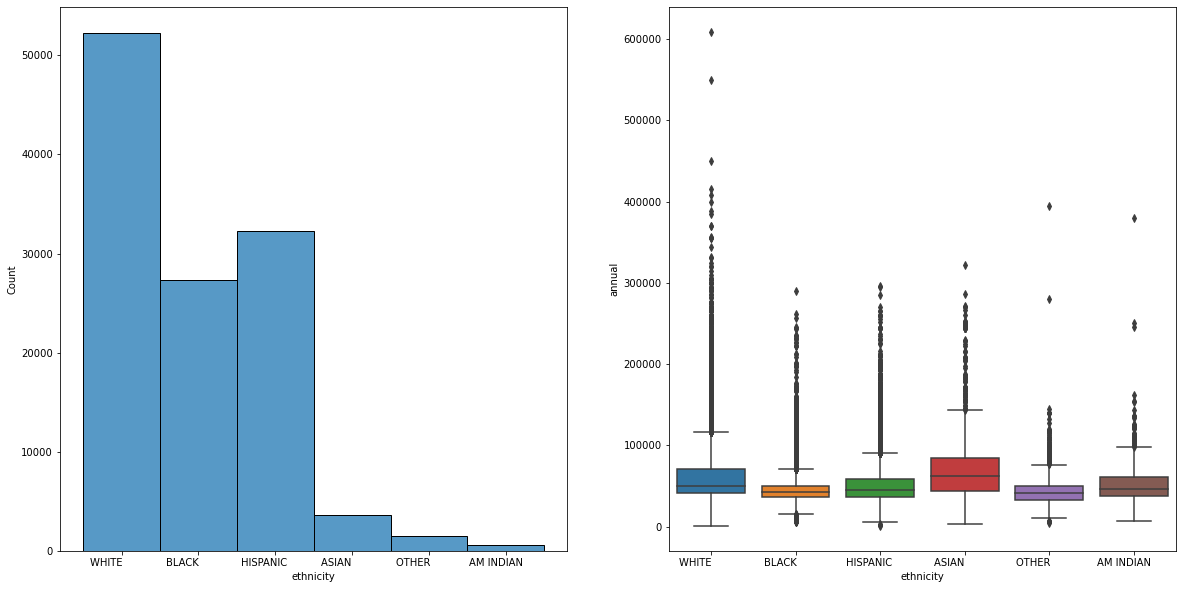

In [131]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.histplot(data=df, x="ethnicity",ax=axs[0])
sns.boxplot(x="ethnicity", y="annual", data=df, ax=axs[1])

It's hard to say if there are any differences in payment for different ethnicities, but there is defonetely higher variance for the white category.There are no levels to use for ethnicity and I will one-hot encode this variable into 6 binary variables

## 1.11 Variable gender

I will first look at the balance between males and females in the sample

In [171]:
print("The share of females in a dataset is %.2f %% " %(100*len(df[df['gender']=='FEMALE         '])/len(df)))
display(df.groupby(['gender']).size())

The share of females in a dataset is 57.41 % 


gender
FEMALE             67447
MALE               50030
dtype: int64

It is notable, that there are spare spaces at the ends of the names for both categories - howether, this should not affect any of the results, as i do not do any transformations for this variable on the basis of category name

<AxesSubplot:xlabel='gender', ylabel='annual'>

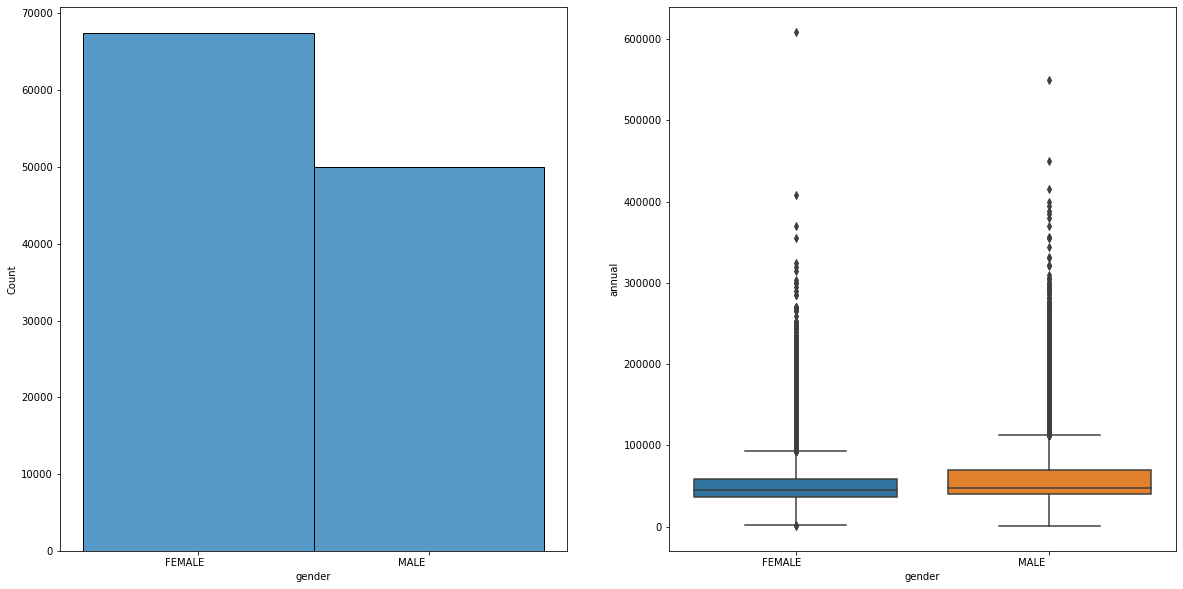

In [132]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.histplot(data=df, x="gender",ax=axs[0])
sns.boxplot(x="gender", y="annual", data=df, ax=axs[1])

Males have sloghtly higher average salary, however this point will be adressed in depth later in the analysis. I will also one-hot encode this variable into 2 binary variables

## 1.12 Variable hire_date

In [172]:
display(df.groupby(['hire_date']).size())

hire_date
01/01/00    20
01/01/01    51
01/01/02    31
01/01/03    61
01/01/04    65
            ..
12/31/10     1
12/31/12     8
12/31/18     2
12/31/19     1
12/31/21     1
Length: 5865, dtype: int64

As the dates are stored as object, I will start with converting it to a datetime

In [175]:
df['hire_date_new'] = pd.to_datetime(df['hire_date'])

I will now look into how many people were hired in each year

In [31]:
df['hire_date_new'].describe()
df.groupby(df['hire_date_new'].dt.year).size()

<ipython-input-31-822b3e3ecfa4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['hire_date_new'].describe()


hire_date_new
1972        1
1973        1
1975        1
1976        5
1977        5
1978        5
1979        7
1980        2
1981       20
1982       11
1983       27
1984       37
1985       46
1986       37
1987       71
1988       67
1989      112
1990      108
1991      106
1992      262
1993      282
1994      402
1995      469
1996      596
1997      640
1998      837
1999      935
2000     1069
2001     1038
2002     1181
2003     1085
2004     2460
2005     2025
2006     2106
2007     2483
2008     2862
2009     2536
2010     2125
2011     2405
2012     3561
2013     4375
2014     4482
2015     4917
2016     7883
2017    13449
2018     9509
2019    11754
2020    11514
2021    17562
2068        1
2069        2
2071        1
dtype: int64

There are several entities with clear mistakes in dates - 4 of them, to be precize. 
I will drop this entities and count the experience in days for the rest of the instances, using the last date as a margin

<ipython-input-177-c82523730a96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['experience']=(pd.to_datetime('2021-12-31')-df1['hire_date_new']).dt.days


<AxesSubplot:xlabel='experience', ylabel='annual'>

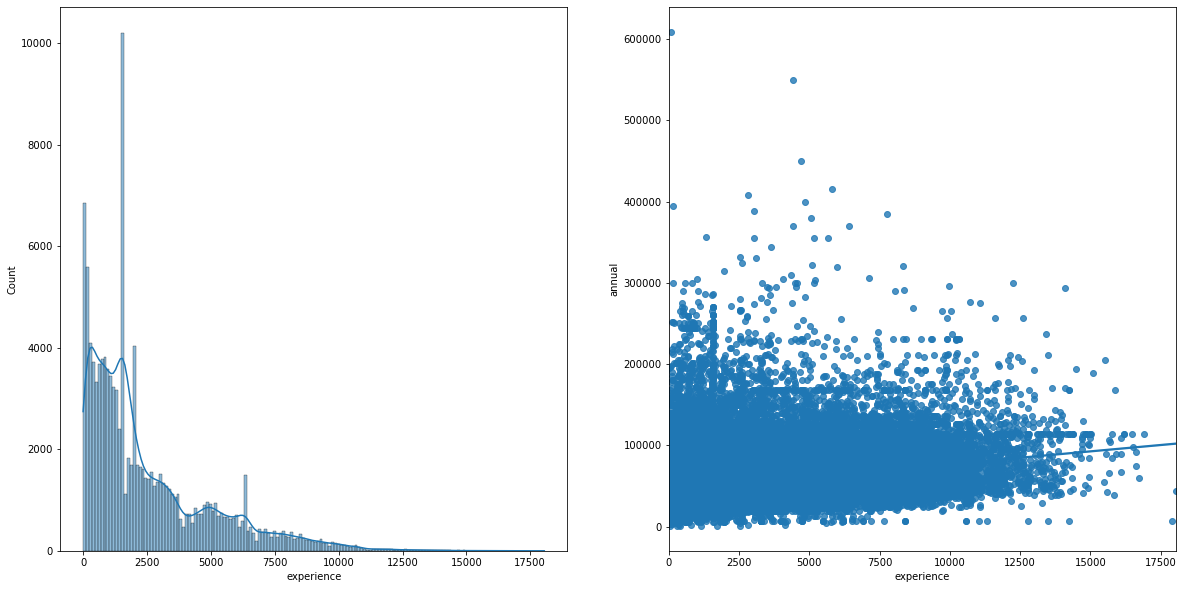

In [177]:
df['hire_date_new'].sort_values(ascending=False).head()

df1 = df[df.hire_date_new <= pd.to_datetime('2021-12-31')]
df.hire_date_new <= pd.to_datetime('2021-12-31')
df1['experience']=(pd.to_datetime('2021-12-31')-df1['hire_date_new']).dt.days

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.histplot(data=df1, x="experience",kde=True,ax=axs[0])
sns.regplot(data=df1, x="experience",y='annual',ax=axs[1])

There is a spike in hiring in the last years, which is interesting. Also, there is a tendency for higher salaries for people with longer experience, however thr variance is too big

# 2. Predicting the values of annual salary

## 2.1 Preparing the dataset

To simplify the transformations of the dataset,I will first create a function to extract the new features from variables class_title and employee_type and drop variables I do not need

In [183]:
def mytransform(X,test=False,impute=False):
    #extracting the level from class_title column
    conditions = [
        (X['class_title'].str[-2:]==' i'   ),
        (X['class_title'].str[-3:]==' ii'  ),
        (X['class_title'].str[-4:]==' iii' ),
        (X['class_title'].str[-3:]==' iv'  ),
        (X['class_title'].str[-2:]==' v'   ),
        (X['class_title'].str[-3:]==' vi'  ),
        (X['class_title'].str[-4:]==' vii' ),
        (X['class_title'].str[-5:]==' viii'),
        ]
    values = [1,2,3,4,5,6,7,8] # creating a list of the values to assign for each condition
    X['class_level'] = np.select(conditions, values) #new column based on conditions
    
    if impute==True:
        classmedian=np.median(X['class_level'])
        X['class_level'] = X['class_level'].replace(0, classmedian) #imputing the median instead of zeros
    
    # extracting features from employee_type
    conditions_type1 = [
        (X['employee_type'].str[:1] =='C'),
        (X['employee_type'].str[:1] =='E'),
        (X['employee_type'].str[:1] =='U'),
        ]
    conditions_type2 = [
        (X['employee_type'].str[1:2]=='R'),
        (X['employee_type'].str[1:2]=='T'),
        ]
    conditions_type3 = [
        (X['employee_type'].str[2:3]=='F'),
        (X['employee_type'].str[2:3]=='P'),
        ]
    values_type1 = ['Classified','Exempd','Unclassified']
    values_type2 = ['Regular','Temporary'] 
    values_type3 = ['Full-time','Part-time'] 

    #new columns based on conditions
    X['employee_level_1'] = np.select(conditions_type1, values_type1) 
    X['employee_level_2'] = np.select(conditions_type2, values_type2)
    X['employee_level_3'] = np.select(conditions_type3, values_type3)

    #converting hiring date to an experience
    X['hire_date_new'] = pd.to_datetime(X['hire_date']) #converting to a datetime
    X = X[X.hire_date_new <= pd.to_datetime('2021-12-31')] #dropping outliers
    X['experience']=(pd.to_datetime('2021-12-31')-X['hire_date_new']).dt.days #calculating experience

    # leaving only variables needed
    if test==True:
        X_prep=X.loc[:,['hrswkd','agency_name','mi','class_code','ethnicity','gender','class_level',
                     'employee_level_1','employee_level_2','employee_level_3','experience']]
    else:
        X_prep=X.loc[:,['hrswkd','agency_name','mi','class_code','ethnicity','gender','class_level',
                     'employee_level_1','employee_level_2','employee_level_3','experience','annual']]
    return X_prep

I will now load the necessary libraries and load data again, applying my tranformation function and deviding it into the features matrix and vector of values to predict

In [184]:
# libraries for data transformation and model fit
from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#models to use
from sklearn                 import linear_model
from sklearn.ensemble        import GradientBoostingRegressor

from sklearn                 import set_config

np.random.seed(1)

# dividing the dataframe into features and result
df = pd.read_csv (r'train_val_data.csv')
df = mytransform(df,impute=True)
X  = df.drop('annual', axis=1)
y  = df['annual']

print('Data devided!')

Data devided!


<ipython-input-183-e42b80d645e4>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['experience']=(pd.to_datetime('2021-12-31')-X['hire_date_new']).dt.days #calculating experience


## 2.2 Creating pipelines

To simplify the work on the models, I will create the pipelines, which will perform the encoding together with initiating the model. I will use three models - Ridge regression, Lasso regression and Gradient Boosting, and choose the best one between the three

In [187]:
categorical_features    = ['agency_name','mi','class_code','ethnicity','gender',
                           'employee_level_1','employee_level_2','employee_level_3']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_features    = ['hrswkd','class_level','experience']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

#Ridge regression pipeline
ridge = Pipeline(
    steps=[("preprocessor", preprocessor), ("predictor", linear_model.Ridge(alpha=.1))]
)
#Lasso regression pipeline
lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("predictor", linear_model.Lasso(alpha=.001))]
)
#GradientBoosting pipeline
grboost = Pipeline(
    steps=[("preprocessor", preprocessor), ("predictor", GradientBoostingRegressor(n_estimators=100,
                                                                                   learning_rate=0.1,
                                                                                   max_depth=6,
                                                                                   loss='ls'))]   
)
print("Pipelines initiated")

Pipelines initiated


## 2.3 Fitting the models

I will now train the models on the data and see what scores will they get to choose the best performing one

In [189]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#fitting the models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
grboost.fit(X_train, y_train)

print("Score for Ridge regression : %.3f" % ridge.score(X_test,y_test))
print("Score for Lasso regression: %.3f" % lasso.score(X_test,y_test))
print("Score for GradientBoosting: %.3f" % grboost.score(X_test,y_test))

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:512: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1642393463236.6775, tolerance: 6840250304.535575
  model = cd_fast.sparse_enet_coordinate_descent(


Score for Ridge regression : 0.926
Score for Lasso regression: 0.915
Score for GradientBoosting: 0.760


Although there might be some fluctuations in a scores for the models, it is apperent that Ridge regression preformes the best, so I will go with this model

## 2.4 Cross validation

In [38]:
scores_ridge = cross_val_score(ridge, X, y, cv=5)
    
print("Mean score for Ridge regression with 5 cross-validations: %.3f" % scores_ridge.mean())

Mean score for Ridge regression with 5 cross-validations: 0.930


The mean score with 5 cross-validations is good enough for me, so I will continue with this model further

In [192]:
set_config(display="diagram")
ridge

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hrswkd', 'class_level',
                                                   'experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['agency_name', 'mi',
                                                   'class_code', 'ethnicity',
                                                   'gender', 'employee_level_1',
                                                   'employee_level_2',
                                                   'employee_level_3'])])),
                ('predictor', Ridge(alpha=0.1))])

I will plot the predicted values against the actual values to visually  asses the quality of the predictions

<AxesSubplot:xlabel='annual'>

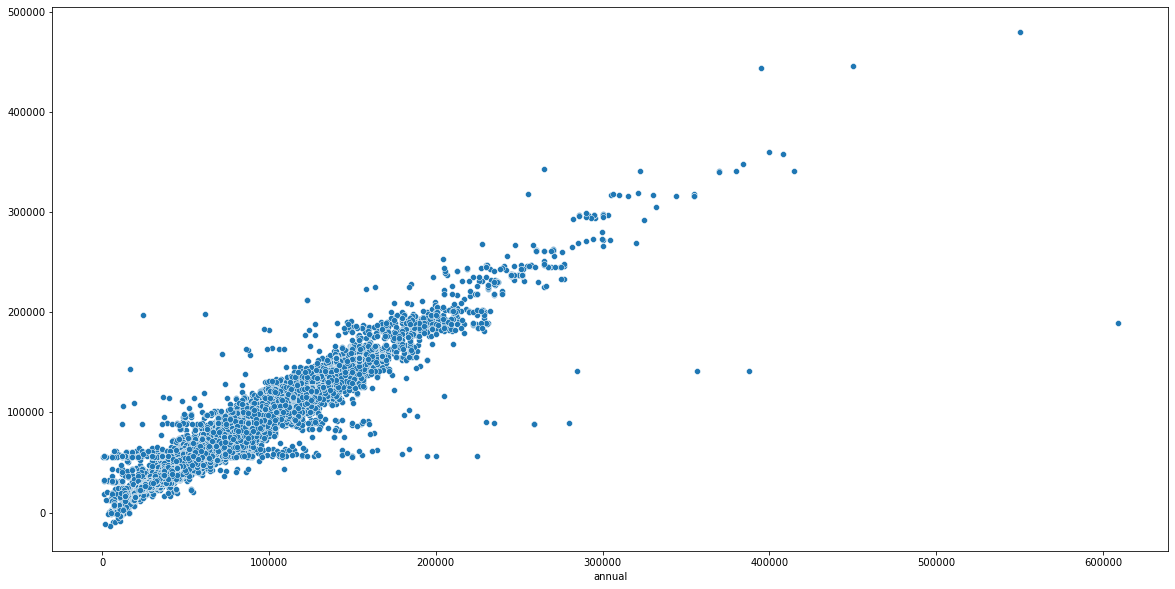

In [193]:
fig= plt.subplots(figsize=(20,10))
sns.scatterplot(x=y,y=ridge.predict(X))

Predicted and actual values generally allign well, but there are clearly some points for which it hasn't worked too well. It's possible to inspect those deeper, but I'm not aiming in the perfect predictions here, so I will stop at this point

## 2.5 Saving results to a file

In [195]:
test = pd.read_csv (r'test_data.csv')
X_test = mytransform(test,test=True)
predictions=ridge.predict(X_test)

np.savetxt('nikita_gorynin_predictions.csv', predictions, delimiter=',')
print('Predictions saved!')

Predictions saved!


# 3. Effect of gender on the salary

To check the effect of gender on the salary, I will look on how much of the predictive power the model takes from the gender variable by excluding it and comparing the scores

## 3.1 Initiating the pipeline for model without gender variable

In [196]:
df = pd.read_csv (r'train_val_data.csv')
df = mytransform(df,impute=True)
X2  = df.drop(['annual','gender'], axis=1)
y2  = df['annual']

categorical_features2    = ['agency_name','mi','class_code','ethnicity',
                           'employee_level_1','employee_level_2','employee_level_3']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_features    = ['hrswkd','class_level','experience']
numeric_transformer = StandardScaler()

preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features2),
    ]
)

#Ridge regression pipeline
ridge2 = Pipeline(
    steps=[("preprocessor", preprocessor2), ("predictor", linear_model.Ridge(alpha=.1))])

  
print("Model without gender initiated")

Model without gender initiated


<ipython-input-183-e42b80d645e4>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['experience']=(pd.to_datetime('2021-12-31')-X['hire_date_new']).dt.days #calculating experience


Now when I have two models - with and without gender, I will cross-validate them both 100 times and calculate scores each time. I will then be able to compare them and access the statistical significance of the differences

In [197]:
scores_ridge_no_gender100 = cross_val_score(ridge2, X2, y2, cv=100)
scores_ridge_gender100 = cross_val_score(ridge, X, y, cv=100)
print('100 samples of cross-validation scores for both models are ready')

100 samples of cross-validation scores for both models are ready


Finally, I will perform the two-tailed t-test and get the difference in mean values between the samples as well as the p-value of those differences

In [200]:
from scipy import stats

meandifference=scores_ridge_gender100.mean()-scores_ridge_no_gender100.mean()
p_value=stats.ttest_ind(scores_ridge_no_gender100, scores_ridge_gender100).pvalue

print('The difference in predictive power between models with and without gender is equal to %.3f' %meandifference,'\n',
      'p-value is equal to %.3f' %p_value)

The difference in predictive power between models with and without gender is equal to 0.000 
 p-value is equal to 0.990


The difference between two models is practically zero and because the p-value is much bigger then 0.05, this difference is absolutely statistically insignificant, hence I can safely conclude that **gender itself does not affect the salary in the given population**

# Thank you for doing it to the end!